In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [141]:
flood = pd.read_csv('flood.csv')

In [142]:
flood.head()

,Date,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
0,2000-01-01,28.8,0.93,0.0,21.0,3.6,91.7,81.4
1,2000-01-02,28.4,0.92,0.0,21.2,3.5,93.0,77.4
2,2000-01-03,29.0,0.93,0.0,22.5,4.0,93.1,81.9
3,2000-01-04,28.8,0.93,0.0,21.2,3.4,92.9,74.7
4,2000-01-05,30.2,0.95,0.0,21.2,1.5,92.4,76.0


In [143]:
flood.shape

(7305, 8)

In [144]:
flood.describe()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
count,7305.000000,7305.000000,7305.00000,7305.000000,7305.000000,7305.000000,7305.000000
mean,121.201721,1.502204,4.27258,28.708100,15.959774,82.012816,64.716524
std,229.863384,0.989241,12.97873,4.691083,6.607647,15.613364,19.921601
min,1.720000,-0.370000,0.00000,13.200000,0.000000,18.600000,8.500000
25%,18.700000,0.810000,0.00000,25.100000,10.000000,75.000000,51.700000
50%,32.700000,1.060000,0.00000,29.500000,17.500000,86.500000,68.400000
75%,142.000000,2.100000,0.80000,32.000000,22.000000,93.600000,79.300000
max,5822.000000,9.130000,298.40000,41.000000,27.400000,128.600000,117.500000


In [145]:
flood['Date'] = pd.to_datetime(flood['Date'])
flood.set_index('Date', inplace=True)

In [146]:
flood.head()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
Date,,,,,,,
2000-01-01,28.8,0.93,0.0,21.0,3.6,91.7,81.4
2000-01-02,28.4,0.92,0.0,21.2,3.5,93.0,77.4
2000-01-03,29.0,0.93,0.0,22.5,4.0,93.1,81.9
2000-01-04,28.8,0.93,0.0,21.2,3.4,92.9,74.7
2000-01-05,30.2,0.95,0.0,21.2,1.5,92.4,76.0


In [147]:
flood.corr()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
Discharge,1.000000,0.862000,0.597616,0.079649,0.352925,0.265933,0.421021
Waterlevel,0.862000,1.000000,0.504566,0.090205,0.453689,0.413983,0.625508
Precipitation,0.597616,0.504566,1.000000,0.052429,0.261874,0.193907,0.286704
max_temperature,0.079649,0.090205,0.052429,1.000000,0.813803,-0.584738,-0.245039
min_temperature,0.352925,0.453689,0.261874,0.813803,1.000000,-0.255900,0.191870
max_humidity,0.265933,0.413983,0.193907,-0.584738,-0.255900,1.000000,0.682107
min_humidity,0.421021,0.625508,0.286704,-0.245039,0.191870,0.682107,1.000000


# Eploratory Data Analysis
## 1. Handling missing values

<Axes: xlabel='Date', ylabel='min_humidity'>

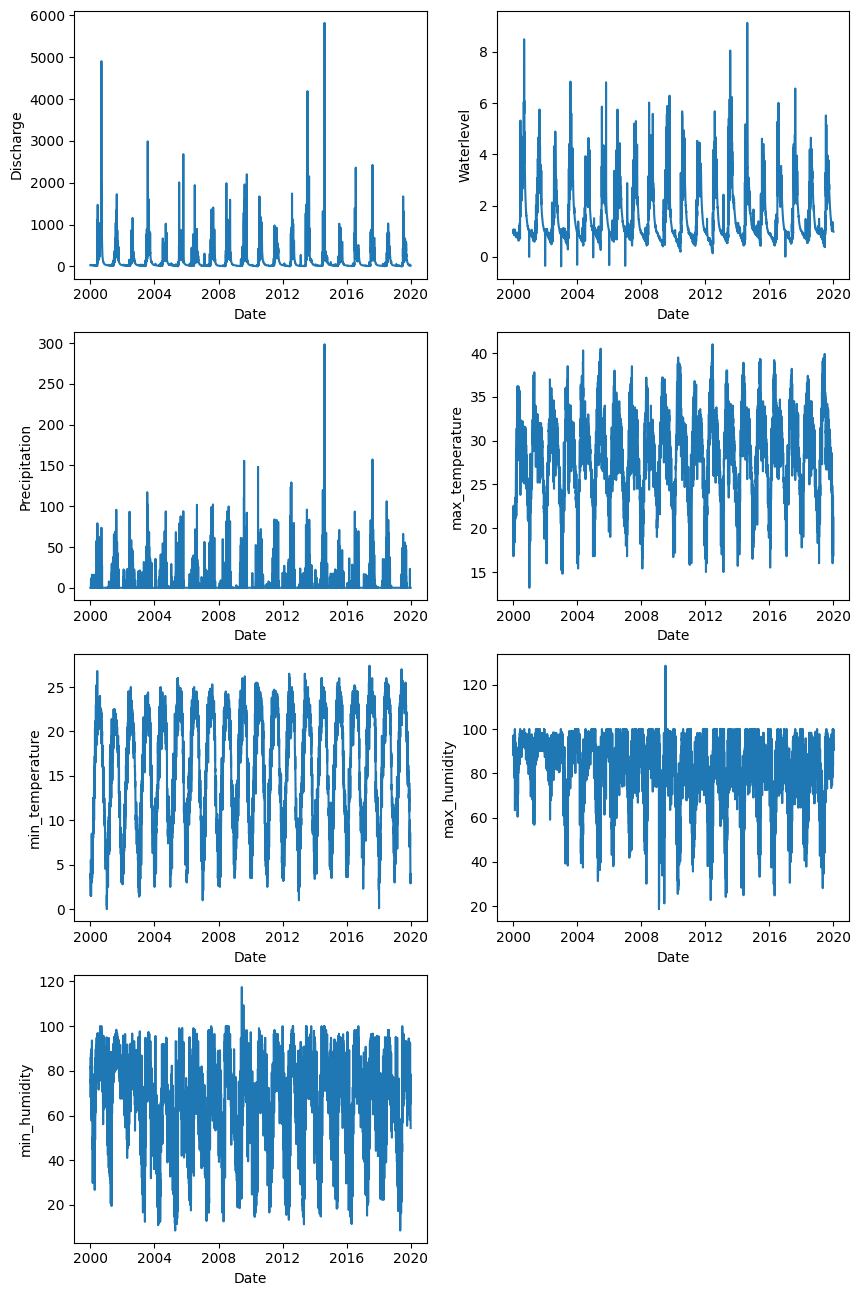

In [157]:
plt.figure(figsize = (10,16))
plt.subplot(4,2,1)
sns.lineplot(x = 'Date', y = 'Discharge', data = flood)
# This figure is based on seasonality. Discharge is increasing in particular season and is neutral at remaining season.
plt.subplot(4,2,2)
sns.lineplot(x = 'Date', y = 'Waterlevel', data = flood)
# This figure is aslo based on seasonality
plt.subplot(4,2,3)
sns.lineplot(x = 'Date', y = 'Precipitation', data = flood)
# This figure is also based on seasonality
plt.subplot(4,2,4)
sns.lineplot(x = 'Date', y = 'max_temperature', data = flood)
# This figure is also based on seasonality. 
plt.subplot(4,2,5)
sns.lineplot(x = 'Date', y = 'min_temperature', data = flood)
# based on seasonality
plt.subplot(4,2,6)
sns.lineplot(x = 'Date', y = 'max_humidity', data = flood)
# Based on seasonality
plt.subplot(4,2,7)
sns.lineplot(x = 'Date', y = 'min_humidity', data = flood)
# Based on seasonality

# Data cleaning and preprocessing
## 1. Handling missing values
      Since the missing data were few in this dataset. I used average value of forwarding and previeous no. in the row where there is only one missing value and used last obeservation carried forward and next observation carried bacward in the rows where there are two or more missing values.

In [158]:
flood.head(4)

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
Date,,,,,,,
2000-01-01,28.8,0.93,0.0,21.0,3.6,91.7,81.4
2000-01-02,28.4,0.92,0.0,21.2,3.5,93.0,77.4
2000-01-03,29.0,0.93,0.0,22.5,4.0,93.1,81.9
2000-01-04,28.8,0.93,0.0,21.2,3.4,92.9,74.7


In [159]:
flood.isnull().sum()

Discharge          0
Waterlevel         0
Precipitation      0
max_temperature    0
min_temperature    0
max_humidity       0
min_humidity       0
dtype: int64

## 2. Checking for Duplicates

In [160]:
flood.duplicated().sum() # There are no duplicates value in the dataset

0

## 3. Detecting and handling outliers
### - Criteria to identify an outlier
#### * Data points that fall outside of 1.5 times of inter quartile range above the 3rd quartile and below the 1st quartile
#### * Data points that fall outside of 3 standard deviations. We can use the z-score and if the z-score fall outsde of 2 standard deviations

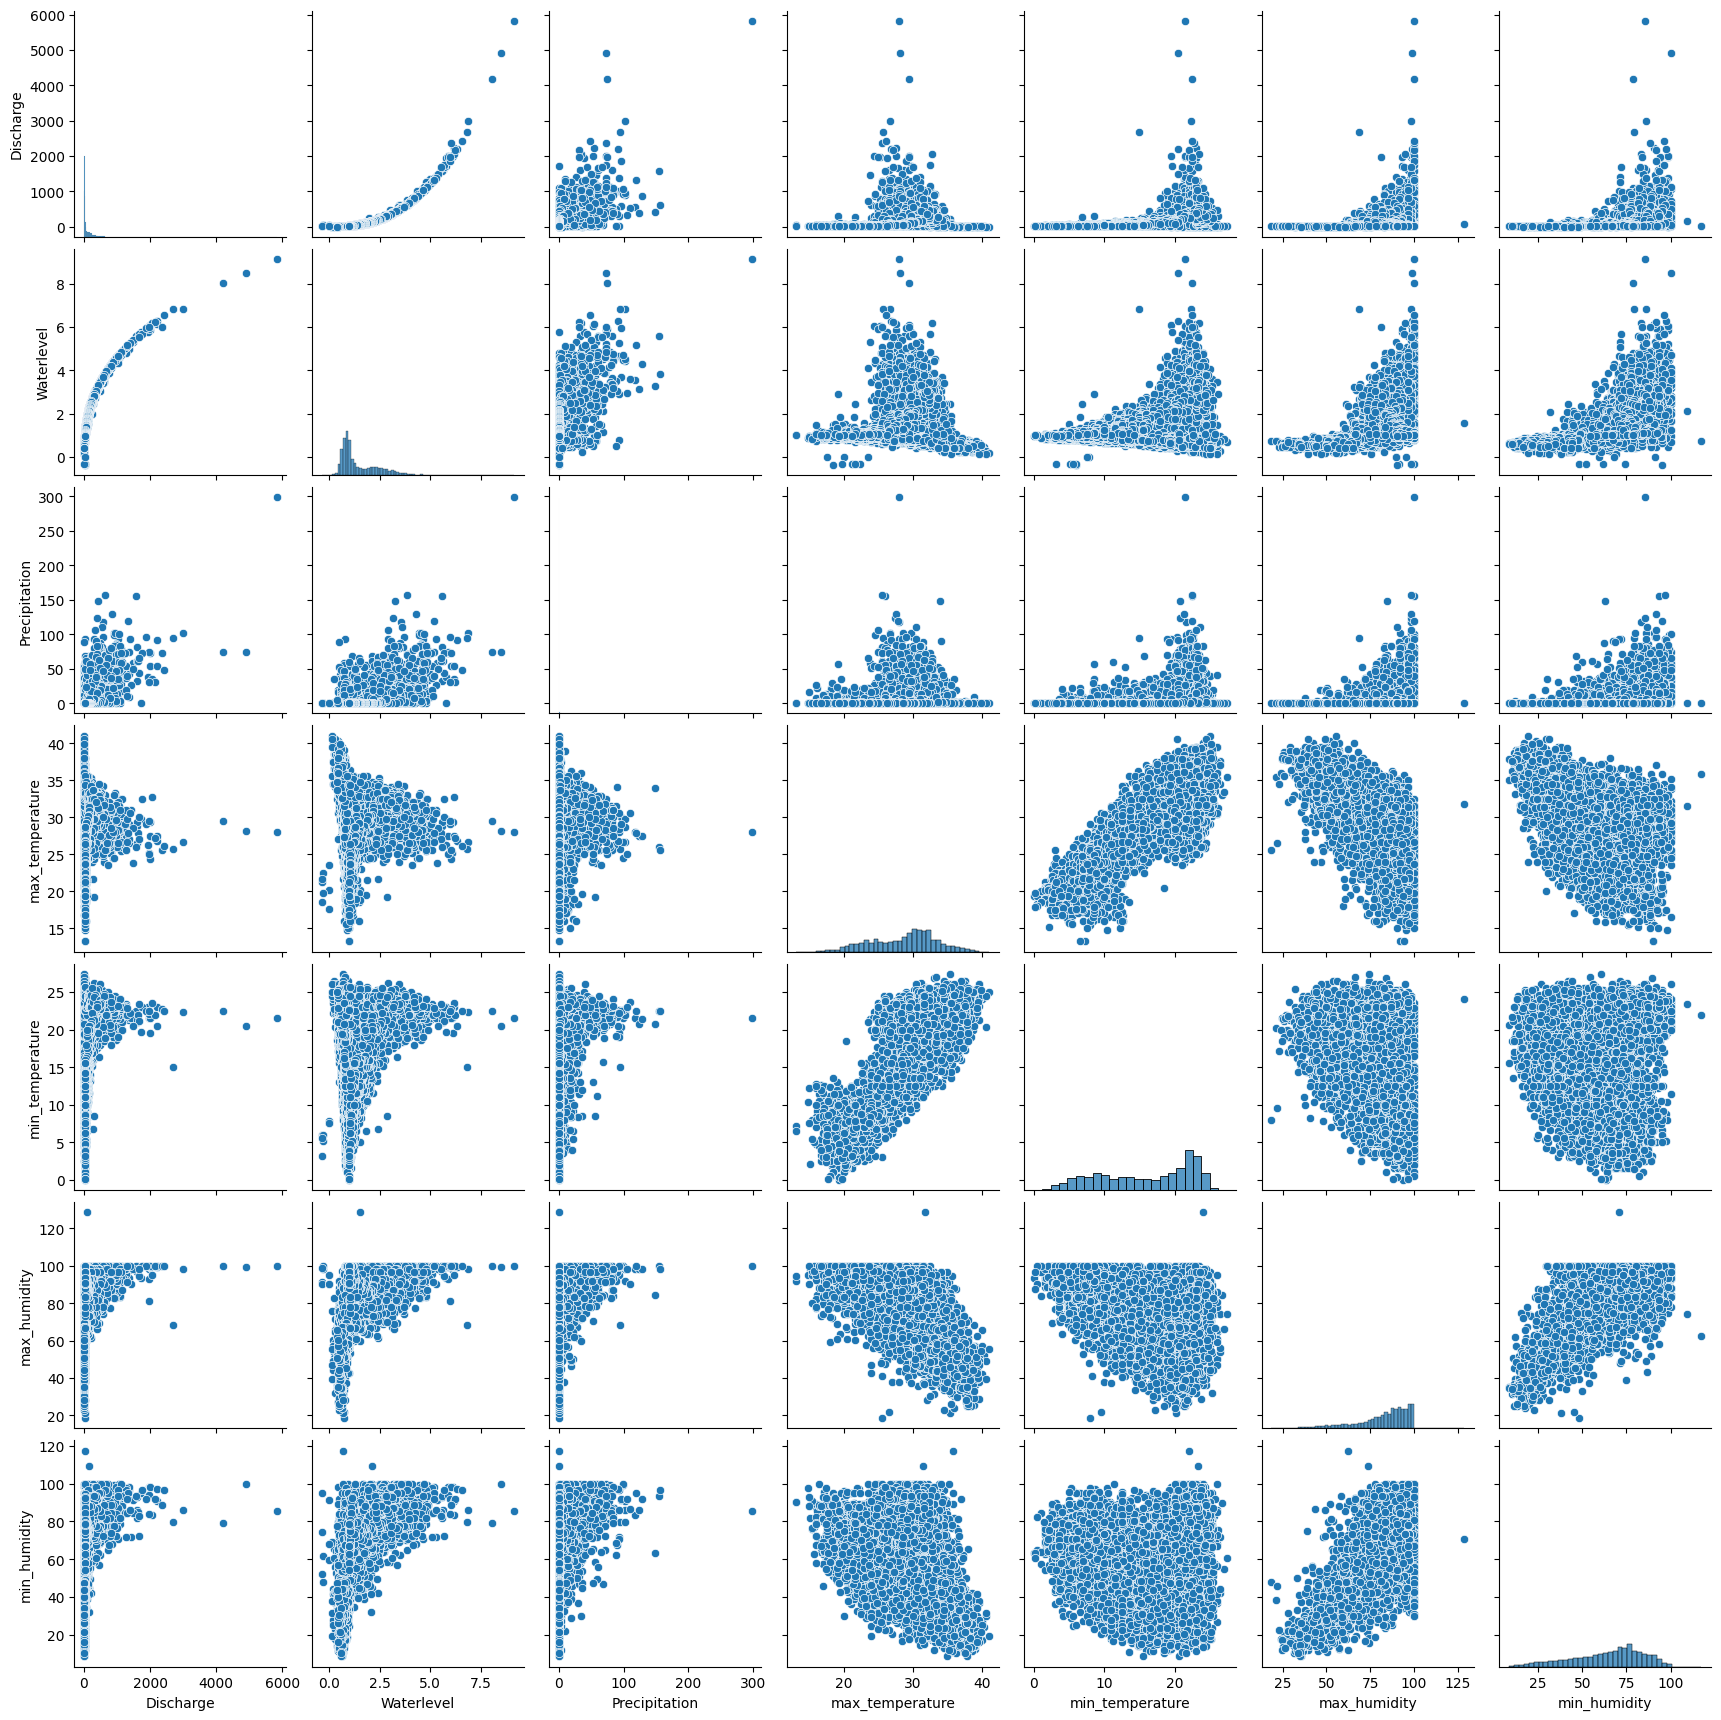

In [161]:
sns.pairplot(flood) # Some of the points that are far from other set of points are outliers.

Text(0.5, 1.0, 'min_humidity')

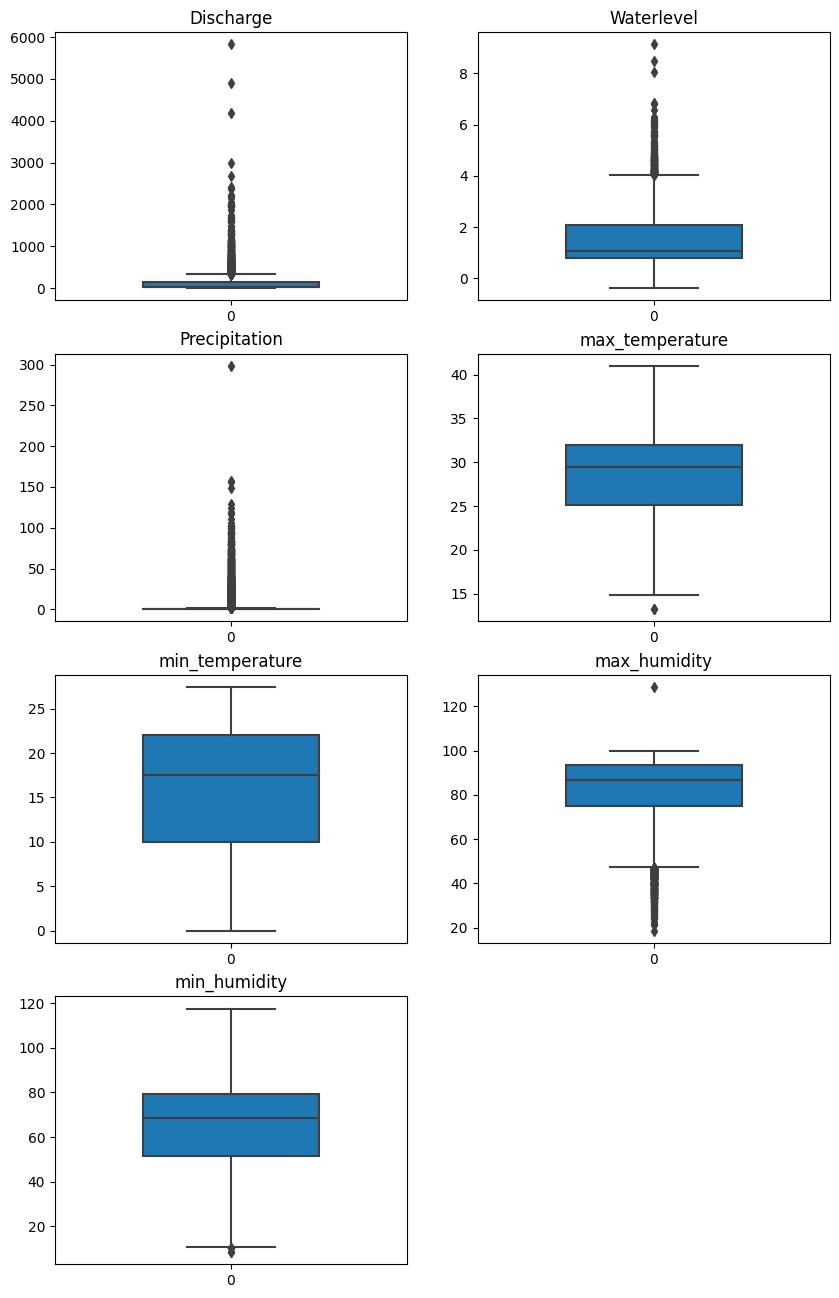

In [164]:
plt.figure(figsize = (10,16))
plt.subplot(4,2,1)
sns.boxplot(flood['Discharge'], width = 0.5, saturation = 5) # box plot helps to detect outliers more clearly. The invidiual dots 
# that are separated from maxminum and minimum values are outliers
plt.title('Discharge')
plt.subplot(4,2,2)
sns.boxplot(flood['Waterlevel'], width = 0.5, saturation = 5)
plt.title('Waterlevel')
plt.subplot(4,2,3)
sns.boxplot(flood['Precipitation'], width = 0.5, saturation = 5)
plt.title('Precipitation')
plt.subplot(4,2,4)
sns.boxplot(flood['max_temperature'], width = 0.5, saturation = 5)
plt.title('max_temperature')
plt.subplot(4,2,5)
sns.boxplot(flood['min_temperature'], width = 0.5, saturation = 5)
plt.title('min_temperature')
plt.subplot(4,2,6)
sns.boxplot(flood['max_humidity'], width = 0.5, saturation = 5)
plt.title('max_humidity')
plt.subplot(4,2,7)
sns.boxplot(flood['min_humidity'], width = 0.5, saturation = 5)
plt.title('min_humidity')

### Detecting outliers using z-score

In [165]:
# outlier = []
# def detect_outlier(data):
#     thresold = 3
#     mean = np.mean(data)
#     std = np.std(data)
    
#     for i in data:
#         z_score = (i-mean)/std
#         if np.abs(z_score)>thresold or np.abs(z_score) < -3:
#             outlier.append(i)
#     return outlier
        

In [166]:
# detect_outlier(flood['Discharge'])

In [167]:
# len(detect_outlier(flood['Discharge']))

In [168]:
# detect_outlier(flood['Waterlevel'])

In [169]:
# len(detect_outlier(flood['Waterlevel']))

In [171]:
# data = flood['Discharge']
# z_scores = (data - np.mean(data)) / np.std(data)

# # Create figure with two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# # Plot original data on first subplot
# ax1.plot(data)
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Data')

# # Plot z scores on second subplot
# ax2.plot(z_scores)
# ax2.axhline(y=3, color='r', linestyle='--', label='Upper Threshold')
# ax2.axhline(y=-3, color='r', linestyle='--', label='Lower Threshold')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Z Scores')
# ax2.legend()

# # Show figure
# plt.show()

In [172]:
# data = flood['Waterlevel']
# z_scores = (data - np.mean(data)) / np.std(data)

# # Create figure with two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# # Plot original data on first subplot
# ax1.plot(data)
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Data')

# # Plot z scores on second subplot
# ax2.plot(z_scores)
# ax2.axhline(y=3, color='r', linestyle='--', label='Upper Threshold')
# ax2.axhline(y=-3, color='r', linestyle='--', label='Lower Threshold')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Z Scores')
# ax2.legend()

# # Show figure
# plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19336\1642981713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flood['Discharge'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19336\1642981713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flood['Waterlevel'])
C:\Users\Acer\AppData\Local\Tem

<Axes: xlabel='min_humidity', ylabel='Density'>

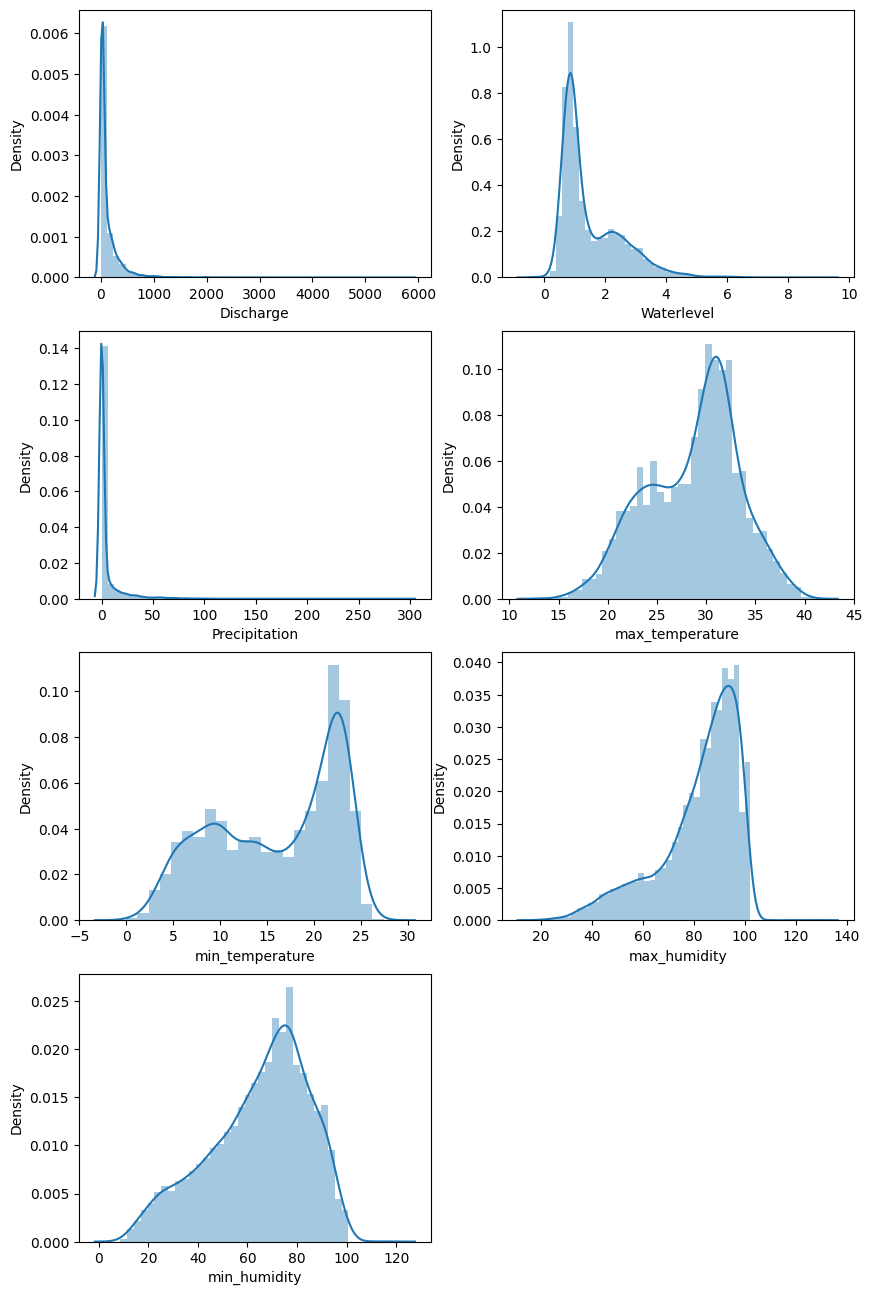

In [173]:
plt.figure(figsize = (10,16))
plt.subplot(4,2,1)
sns.distplot(flood['Discharge'])
plt.subplot(4,2,2)
sns.distplot(flood['Waterlevel'])
plt.subplot(4,2,3)
sns.distplot(flood['Precipitation'])
plt.subplot(4,2,4)
sns.distplot(flood['max_temperature'])
plt.subplot(4,2,5)
sns.distplot(flood['min_temperature'])
plt.subplot(4,2,6)
sns.distplot(flood['max_humidity'])
plt.subplot(4,2,7)
sns.distplot(flood['min_humidity'])

In [174]:
print(flood['Discharge'].skew())
print(flood['Waterlevel'].skew())
print(flood['Precipitation'].skew())
print(flood['max_temperature'].skew())
print(flood['min_temperature'].skew())
print(flood['max_humidity'].skew())
print(flood['min_humidity'].skew())

7.38778895874255
1.4947112925227184
5.815329180244221
-0.31116762193270714
-0.37509444402288594
-1.191060779028163
-0.5616731145555816


#### Since the above data are not normally distributed which is clearly seen from above figure. From above calculation of skewness these data are skewed. So, we cannot remove their outlier using z-score. So, we will use inter quartile method to remove outlier

### Using inter quartile range


In [130]:
outlier = []
def IQR_outlier(data):
    #data = sorted(data)
    quartile1, quartile3 = np.percentile(data, (25,75))
    #print(quartile1, quartile3)
    IQR = quartile3 - quartile1
    lower_quartile_bound = quartile1 - IQR * 1.5
    upper_quartile_bound = quartile3 + IQR * 1.5
#     print(lower_quartile_bound)
#     print(upper_quartile_bound)
#     print("quartile1 = ", quartile1, "and quartile2 = ", quartile3)
    for i in data:
        data= np.where(data> upper_quartile_bound, upper_quartile_bound,
                            np.where( data< lower_quartile_bound, lower_quartile_bound,
                                    data)
                             )
    return data

In [177]:
flood1 = flood.copy()

In [178]:
flood1['Discharge'] = IQR_outlier(flood1['Discharge'])

In [183]:
flood1['Waterlevel'] = IQR_outlier(flood1['Waterlevel'])

In [184]:
flood1['Precipitation'] = IQR_outlier(flood1['Precipitation'])

In [185]:
flood1['max_temperature'] = IQR_outlier(flood1['max_temperature'])

In [186]:
flood1['min_temperature'] = IQR_outlier(flood1['min_temperature'])

In [187]:
flood1['max_humidity'] = IQR_outlier(flood1['max_humidity'])

In [188]:
flood1['min_humidity'] = IQR_outlier(flood1['min_humidity'])

In [189]:
flood1.head()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
Date,,,,,,,
2000-01-01,28.8,0.93,0.0,21.0,3.6,91.7,81.4
2000-01-02,28.4,0.92,0.0,21.2,3.5,93.0,77.4
2000-01-03,29.0,0.93,0.0,22.5,4.0,93.1,81.9
2000-01-04,28.8,0.93,0.0,21.2,3.4,92.9,74.7
2000-01-05,30.2,0.95,0.0,21.2,1.5,92.4,76.0


In [190]:
flood1.shape

(7305, 7)

Text(0.5, 1.0, 'min_humidity')

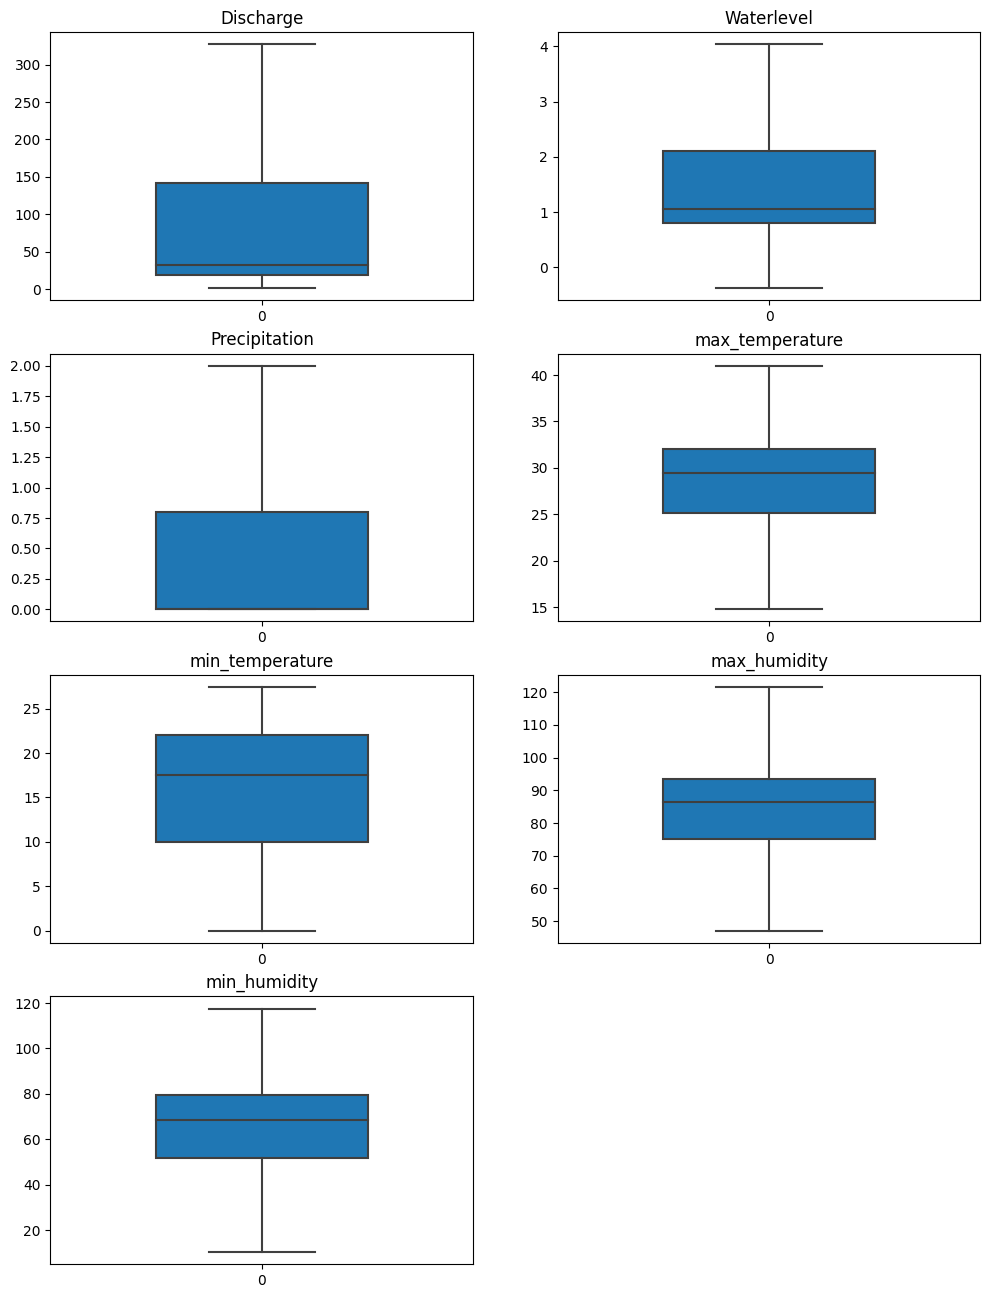

In [194]:
plt.figure(figsize = (12,16))
plt.subplot(4,2,1)
sns.boxplot(flood1['Discharge'], width = 0.5, saturation = 5)
plt.title('Discharge')
plt.subplot(4,2,2)
sns.boxplot(flood1['Waterlevel'], width = 0.5, saturation = 5)
plt.title('Waterlevel')
plt.subplot(4,2,3)
sns.boxplot(flood1['Precipitation'], width = 0.5, saturation = 5)
plt.title('Precipitation')
plt.subplot(4,2,4)
sns.boxplot(flood1['max_temperature'], width = 0.5, saturation = 5)
plt.title('max_temperature')
plt.subplot(4,2,5)
sns.boxplot(flood1['min_temperature'], width = 0.5, saturation = 5)
plt.title('min_temperature')
plt.subplot(4,2,6)
sns.boxplot(flood1['max_humidity'], width = 0.5, saturation = 5)
plt.title('max_humidity')
plt.subplot(4,2,7)
sns.boxplot(flood1['min_humidity'], width = 0.5, saturation = 5)
plt.title('min_humidity')

In [195]:
flood1.describe() # this describes the information of data after removing outlier

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,92.163760,1.485639,0.488542,28.708524,15.959774,82.330420,64.717031
std,106.623781,0.931148,0.831167,4.689750,6.607647,14.752735,19.920195
min,1.720000,-0.370000,0.000000,14.750000,0.000000,47.100000,10.300000
25%,18.700000,0.810000,0.000000,25.100000,10.000000,75.000000,51.700000
50%,32.700000,1.060000,0.000000,29.500000,17.500000,86.500000,68.400000
75%,142.000000,2.100000,0.800000,32.000000,22.000000,93.600000,79.300000
max,326.950000,4.035000,2.000000,41.000000,27.400000,121.500000,117.500000


## Converting into Stationerity
#### Criteria for data being stationerity
##### 1. Constant mean
##### 2. constand standard deviation
##### 3. No seasonality

#### How it can be converted into Stationerity
1. Differencing:
 There are two methods of differencing: normal differencing and seasonal differencing
 normal differencing y(t) = y(t) - y(t-1)
2. Rolling statistics:
Use rolling function with windo
3. Transformation:
In transformation we applty log (log), square root (sqrt), cube root (cbrt) to change data into stationerity

In [197]:
flood2 = flood1.copy()

In [198]:
flood2['Discharge'] = flood['Discharge'] - flood['Discharge'].shift(1) # normal differencing

<Axes: xlabel='Date'>

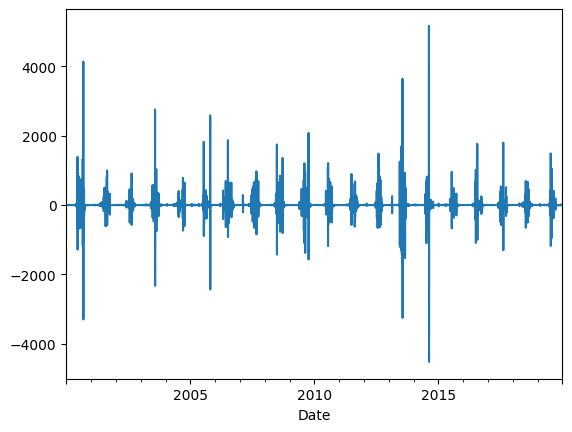

In [199]:
flood2['Discharge'].dropna().plot()

In [201]:
len(flood2['Discharge'].dropna())

7304

In [216]:
flood2['Discharge'] = flood2['Discharge'].rolling(window = 20).mean() # rolling statistics

<Axes: xlabel='Date'>

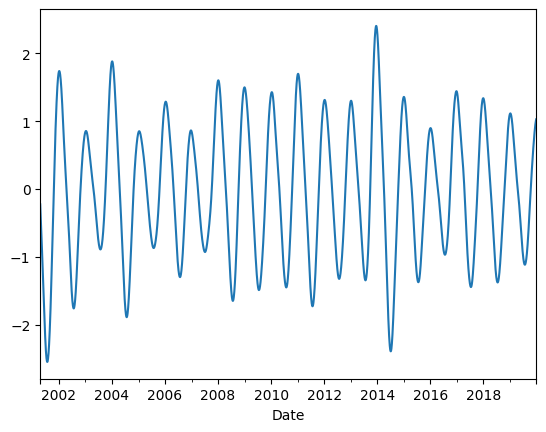

In [217]:
flood2['Discharge'].dropna().plot()

In [222]:
flood2['Discharge'] = flood2['Discharge'].dropna()

In [226]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(data):
    # perform the Augmented Dickey-Fuller test
    result = adfuller(data)
    
    # extract the p-value from the test result
    pvalue = result[1]
    print("p-value:", pvalue)
    if pvalue < 0.05:
        print("The time series is stationary")
    else:
        print("The time series is non-stationary")